In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import gzip, re, tqdm
import shapely.geometry as geo
import geopandas
%matplotlib inline

In [13]:
fleet_sizes = [200, 1000, 2000, 4000, 10000]

In [16]:
for fleet_size in fleet_sizes:
    !scp nama:lima/context/output/av_{fleet_size}_56/modestats.txt modestats_{fleet_size}.txt
    !scp nama:lima/context/output/av_{fleet_size}_56/prices.csv prices_{fleet_size}.csv

modestats.txt                                 100%   64KB  64.1KB/s   00:00    
prices.csv                                    100% 8750     8.5KB/s   00:00    
modestats.txt                                 100%   64KB  63.8KB/s   00:00    
prices.csv                                    100% 8750     8.5KB/s   00:00    
modestats.txt                                 100%   64KB  63.9KB/s   00:00    
prices.csv                                    100% 8750     8.5KB/s   00:00    
modestats.txt                                 100%   26KB  26.1KB/s   00:00    
prices.csv                                    100% 3536     3.5KB/s   00:00    
modestats.txt                                 100%   13KB  12.7KB/s   00:00    
prices.csv                                    100% 1708     1.7KB/s   00:00    


Text(0, 0.5, 'Share av_direct')

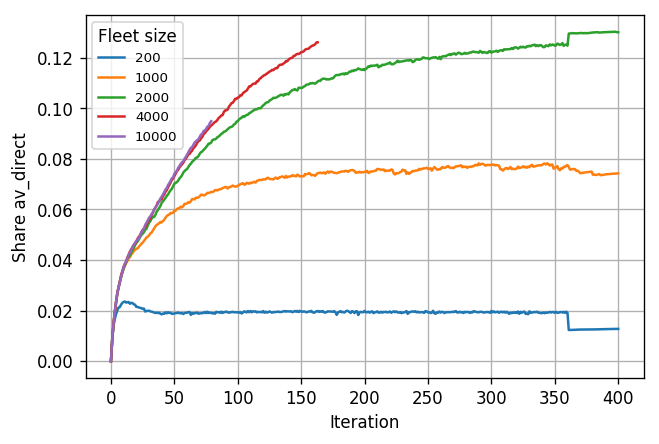

In [21]:
# Plot shares
plt.figure(dpi = 120)

for fleet_size in fleet_sizes:
    data = pd.read_csv("modestats_%d.txt" % fleet_size, sep = "\t")
    
    iterations = data["Iteration"].values
    share = data["av_direct"].values
    
    plt.plot(iterations, share, label = str(fleet_size))

plt.legend(title = "Fleet size", loc = "best", fontsize = 8)
plt.grid()
plt.xlabel("Iteration")
plt.ylabel("Share av_direct")

(0, 1.5)

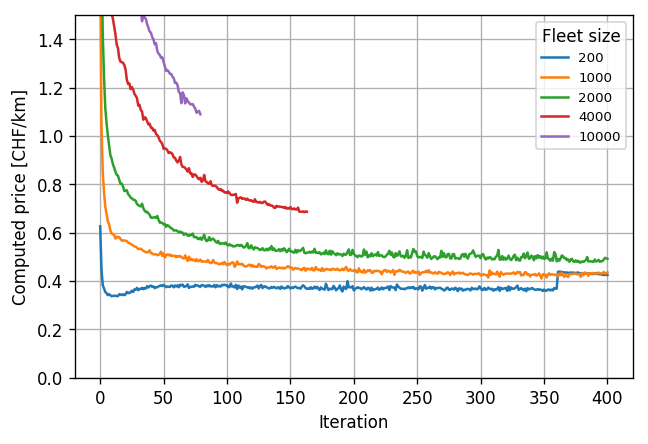

In [24]:
# Plot shares
plt.figure(dpi = 120)

for fleet_size in fleet_sizes:
    data = pd.read_csv("prices_%d.csv" % fleet_size, sep = ";")
    
    iterations = data["iteration"].values
    computed_price = data["computed_price"].values
    
    plt.plot(iterations, computed_price, label = str(fleet_size))

plt.legend(title = "Fleet size", loc = "best", fontsize = 8)
plt.grid()
plt.xlabel("Iteration")
plt.ylabel("Computed price [CHF/km]")

plt.ylim([0, 1.5])

In [26]:
!scp nama:lima/context/output/av_2000_56/output_network.xml.gz output_network.xml.gz
!scp nama:lima/context/output/av_2000_56/ITERS/it.400/400.lima_waiting_time.csv waiting_time.csv

400.lima_waiting_time.csv                     100% 3131KB   3.1MB/s   00:00    


In [102]:
df_waiting_time = pd.read_csv("waiting_time.csv", sep = ";")
df_waiting_time["group_id"] = df_waiting_time["link_id"].astype(str)

df_shape = geopandas.read_file("network.shp")[["group_id", "geometry"]]
df_shape = df_shape.dropna().drop_duplicates("group_id")

df = pd.merge(df_shape, df_waiting_time, on = "group_id", how = "inner")

In [104]:
df.to_file("waiting_time.shp")

In [8]:
df = pd.read_csv("/run/media/sebastian/shoerl_data/claudio_lima/services.csv", sep = ";")
df["geometry_origin"] = [geo.Point(*xy) for xy in zip(df["origin_x"], df["origin_y"])]
df["geometry_destination"] = [geo.Point(*xy) for xy in zip(df["destination_x"], df["destination_y"])]
df["geometry"] = [geo.LineString(pp) for pp in zip(df["geometry_origin"], df["geometry_destination"])]
df = geopandas.GeoDataFrame(df, crs = {"init": "EPSG:2056"})
df[[
    "mode", "geometry"
]].to_file("/run/media/sebastian/shoerl_data/claudio_lima/services.shp")